# Library

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Support Function

In [2]:
def inspect_data(df, col=None, n_rows=5):
    # cek shape data
    print(f'data shape: {df.shape}')
    
    # definisikan kolom
    if col is None:
        col = df.columns

    # cek head data, gunakan fungsi display untuk menampilkan dataframe
    display(df[col].head(n_rows))

In [3]:
def check_missing(df, cut_off=0, sort=True):
    freq=df.isnull().sum()
    percent=df.isnull().sum()/df.shape[0]*100
    types=df.dtypes
    unique = df.apply(pd.unique).to_frame(name='Unique Values')['Unique Values']
    df_miss=pd.DataFrame({'missing_percentage':percent, 'missing_frequency':freq, 'types':types, 'unique_values':unique})
    if sort: df_miss.sort_values(by='missing_frequency',ascending= False, inplace=True)
    return df_miss[df_miss['missing_percentage'] >= cut_off]

In [4]:
def fillna_by_metric(df, column_name, metric='mean', custom_value=None):
    # Mengambil nilai metrik sesuai input
    if metric == 'mean':
        metric_value = df[column_name].mean()
    elif metric == 'median':
        metric_value = df[column_name].median()
    elif metric == 'mode':
        metric_value = df[column_name].mode().iloc[0]
    elif metric == 'zero':
        metric_value = 0
    elif metric == 'custom':
        metric_value = custom_value
    else:
        raise ValueError("Invalid metric type")
    
    # Mengisi missing value pada kolom dengan nilai metrik yang sudah diambil
    df[column_name].fillna(value=metric_value, inplace=True)
    
    return df

# Load Data

In [5]:
# load data transaksi
df_orders = pd.read_csv('orders.csv')
inspect_data(df_orders, n_rows=3)

data shape: (21350, 3)


,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28


In [6]:
# load data transaksi
df_order_details = pd.read_csv('order_details.csv')
inspect_data(df_order_details, n_rows=3)

data shape: (48620, 4)


,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1


In [7]:
# load data transaksi
df_pizzas = pd.read_csv('pizzas.csv')
inspect_data(df_pizzas, n_rows=3)

data shape: (96, 4)


,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.750
1,bbq_ckn_m,bbq_ckn,M,16.750
2,bbq_ckn_l,bbq_ckn,L,20.750


# Inspeksi Data

In [8]:
# Check Missing Data
check_missing(df_orders)

,missing_percentage,missing_frequency,types,unique_values
order_id,0.000,0,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
date,0.000,0,object,"[2015-01-01, 2015-01-02, 2015-01-03, 2015-01-0..."
time,0.000,0,object,"[11:38:36, 11:57:40, 12:12:28, 12:16:31, 12:21..."


In [9]:
# Check Missing Data
check_missing(df_order_details)

,missing_percentage,missing_frequency,types,unique_values
order_details_id,0.000,0,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
order_id,0.000,0,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
pizza_id,0.000,0,object,"[hawaiian_m, classic_dlx_m, five_cheese_l, ita..."
quantity,0.000,0,int64,"[1, 2, 3, 4]"


In [10]:
# Check Missing Data
check_missing(df_pizzas)

,missing_percentage,missing_frequency,types,unique_values
pizza_id,0.000,0,object,"[bbq_ckn_s, bbq_ckn_m, bbq_ckn_l, cali_ckn_s, ..."
pizza_type_id,0.000,0,object,"[bbq_ckn, cali_ckn, ckn_alfredo, ckn_pesto, so..."
size,0.000,0,object,"[S, M, L, XL, XXL]"
price,0.000,0,float64,"[12.75, 16.75, 20.75, 12.0, 16.0, 20.5, 10.5, ..."


In [11]:
# cek shape dan head data
print(f'data shape: {df_orders.shape}')
df_orders.head()

data shape: (21350, 3)


,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [12]:
# cek shape dan head data
print(f'data shape: {df_order_details.shape}')
df_order_details.head()

data shape: (48620, 4)


,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [13]:
# cek shape dan head data
print(f'data shape: {df_pizzas.shape}')
df_pizzas.head()

data shape: (96, 4)


,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.750
1,bbq_ckn_m,bbq_ckn,M,16.750
2,bbq_ckn_l,bbq_ckn,L,20.750
3,cali_ckn_s,cali_ckn,S,12.750
4,cali_ckn_m,cali_ckn,M,16.750


In [14]:
# Check Info Data
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [15]:
# Check Info Data
df_order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
# Check Info Data
df_pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [17]:
# Cleansing Duplicated
df_orders.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21345    False
21346    False
21347    False
21348    False
21349    False
Length: 21350, dtype: bool

In [18]:
df_orders[df_orders.duplicated()]

,order_id,date,time


In [19]:
df_order_details.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48615    False
48616    False
48617    False
48618    False
48619    False
Length: 48620, dtype: bool

In [20]:
df_order_details[df_order_details.duplicated()]

,order_details_id,order_id,pizza_id,quantity


In [21]:
df_pizzas.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83  

In [22]:
df_pizzas[df_pizzas.duplicated()]

,pizza_id,pizza_type_id,size,price


# Data Analysis

In [23]:
# Baca data dari tabel 'orders'
df_orders = pd.read_csv('orders.csv')

# Konversi kolom 'date' menjadi tipe data datetime
df_orders['date'] = pd.to_datetime(df_orders['date'])

# Buat kolom baru 'YearMonth' dengan format YYYY-MM
df_orders['YearMonth'] = df_orders['date'].dt.strftime('%Y-%m')

In [24]:
print(df_orders)

       order_id       date      time YearMonth
0             1 2015-01-01  11:38:36   2015-01
1             2 2015-01-01  11:57:40   2015-01
2             3 2015-01-01  12:12:28   2015-01
3             4 2015-01-01  12:16:31   2015-01
4             5 2015-01-01  12:21:30   2015-01
...         ...        ...       ...       ...
21345     21346 2015-12-31  20:51:07   2015-12
21346     21347 2015-12-31  21:14:37   2015-12
21347     21348 2015-12-31  21:23:10   2015-12
21348     21349 2015-12-31  22:09:54   2015-12
21349     21350 2015-12-31  23:02:05   2015-12

[21350 rows x 4 columns]


In [25]:
# Hitung jumlah 'order_id' di setiap tahun-bulan
monthly_orders = df_orders.groupby('YearMonth')['order_id'].count().reset_index()

In [26]:
print(monthly_orders)

   YearMonth  order_id
0    2015-01      1845
1    2015-02      1685
2    2015-03      1840
3    2015-04      1799
4    2015-05      1853
5    2015-06      1773
6    2015-07      1935
7    2015-08      1841
8    2015-09      1661
9    2015-10      1646
10   2015-11      1792
11   2015-12      1680


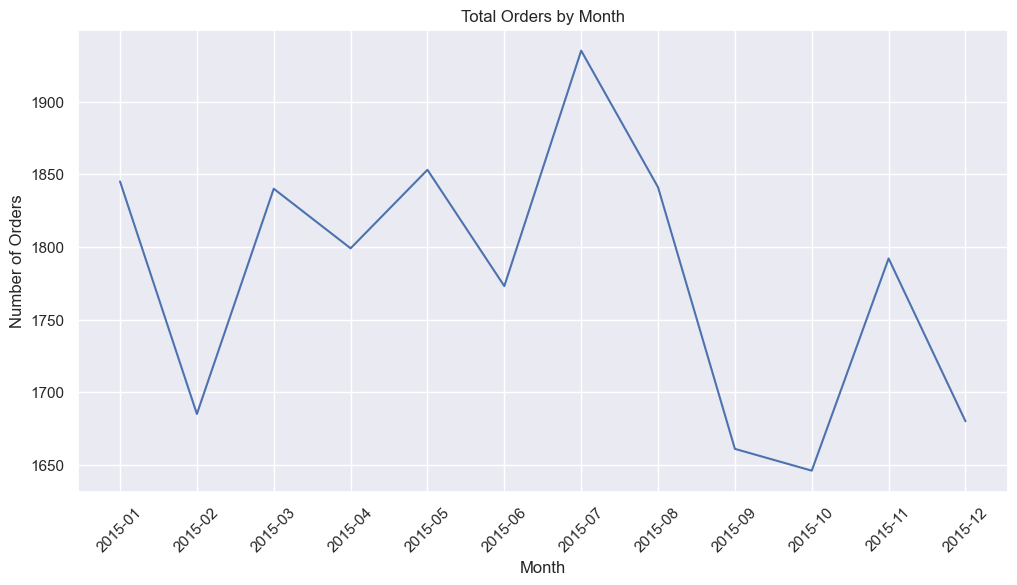

In [27]:
# Atur gaya default Seaborn
sns.set()

# Buat line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders, x='YearMonth', y='order_id')
plt.title('Total Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Temukan bulan dengan jumlah pesanan tertinggi
max_orders_month = monthly_orders.loc[monthly_orders['order_id'].idxmax()]

print("Ringkasan Bulan dengan Pesanan Tertinggi:")
print("Bulan:", max_orders_month['YearMonth'])
print("Jumlah Pesanan:", max_orders_month['order_id'])

Ringkasan Bulan dengan Pesanan Tertinggi:
Bulan: 2015-07
Jumlah Pesanan: 1935


In [29]:
# Baca data dari tabel 'orders'
df_orders = pd.read_csv('orders.csv')

# Konversi kolom 'time' menjadi tipe data datetime
df_orders['time'] = pd.to_datetime(df_orders['time'])

In [30]:
print(df_orders)

       order_id        date                time
0             1  2015-01-01 2023-09-02 11:38:36
1             2  2015-01-01 2023-09-02 11:57:40
2             3  2015-01-01 2023-09-02 12:12:28
3             4  2015-01-01 2023-09-02 12:16:31
4             5  2015-01-01 2023-09-02 12:21:30
...         ...         ...                 ...
21345     21346  2015-12-31 2023-09-02 20:51:07
21346     21347  2015-12-31 2023-09-02 21:14:37
21347     21348  2015-12-31 2023-09-02 21:23:10
21348     21349  2015-12-31 2023-09-02 22:09:54
21349     21350  2015-12-31 2023-09-02 23:02:05

[21350 rows x 3 columns]


In [31]:
# Ekstrak jam dari kolom 'time'
df_orders['hour'] = df_orders['time'].dt.hour

# Hitung jumlah pesanan dalam setiap jam
hourly_orders = df_orders.groupby('hour')['order_id'].count().reset_index()

In [32]:
print(hourly_orders)

    hour  order_id
0      9         1
1     10         8
2     11      1231
3     12      2520
4     13      2455
5     14      1472
6     15      1468
7     16      1920
8     17      2336
9     18      2399
10    19      2009
11    20      1642
12    21      1198
13    22       663
14    23        28


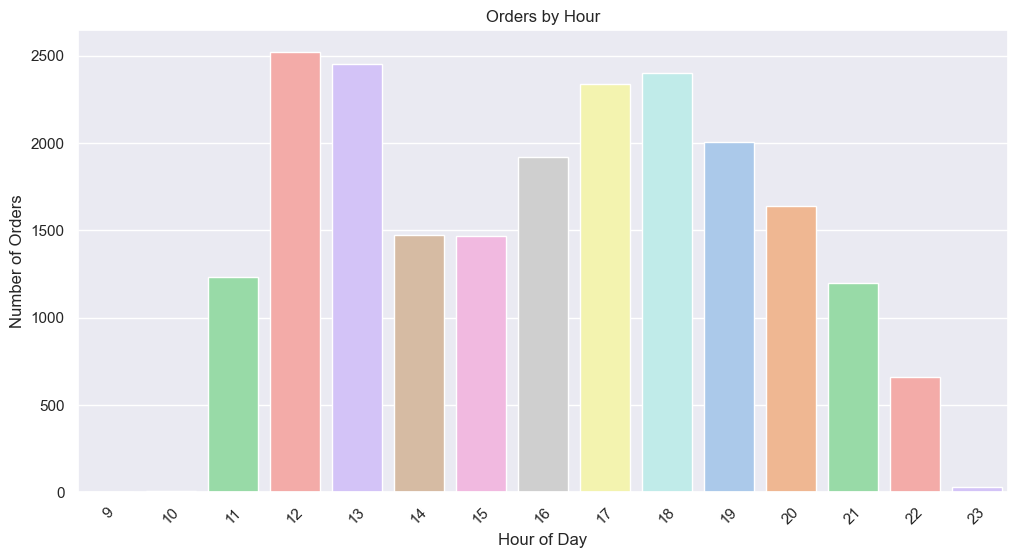

In [33]:
# Atur gaya default Seaborn
sns.set()

# Buat bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_orders, x='hour', y='order_id', palette='pastel')
plt.title('Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

## Ringkasan Jam Tersibuk

Dalam analisis data kami, kami telah mengidentifikasi jam-jam tersibuk berdasarkan jumlah pesanan. Berikut adalah beberapa temuan kami:

- **Jam Tersibuk Teratas:** Jam 12.00 siang

- **Jam Paling Sepi:** Jam 22.00 malam

- **Grafik Jam Tersibuk:** Di bawah ini adalah grafik yang menunjukkan jumlah pesanan per jam dalam sehari.

![Grafik Jam Tersibuk](nama_file_gambar.png)

Dengan mengetahui jam-jam tersibuk, Anda dapat merencanakan sumber daya dengan lebih baik untuk mengatasi lonjakan pesanan pada jam-jam tersebut.

In [34]:
# Gabungkan tabel 'order_details' dengan tabel 'pizzas'
merged_data = pd.merge(df_order_details, df_pizzas, on='pizza_id')

In [35]:
print(merged_data)

       order_details_id  order_id       pizza_id  quantity pizza_type_id size  \
0                     1         1     hawaiian_m         1      hawaiian    M   
1                   179        77     hawaiian_m         1      hawaiian    M   
2                   357       146     hawaiian_m         1      hawaiian    M   
3                   389       163     hawaiian_m         1      hawaiian    M   
4                   568       247     hawaiian_m         1      hawaiian    M   
...                 ...       ...            ...       ...           ...  ...   
48615             39733     17492  the_greek_xxl         1     the_greek  XXL   
48616             41183     18139  the_greek_xxl         1     the_greek  XXL   
48617             42718     18789  the_greek_xxl         1     the_greek  XXL   
48618             43041     18919  the_greek_xxl         1     the_greek  XXL   
48619             47490     20866  the_greek_xxl         1     the_greek  XXL   

       price  
0     13.250

In [36]:
# Hitung total kuantitas setiap 'pizza_type_id' dan urutkan dalam urutan menurun
pizza_quantity = merged_data.groupby('pizza_type_id')['quantity'].sum().reset_index()
pizza_quantity = pizza_quantity.sort_values(by='quantity', ascending=False)

In [37]:
print(pizza_quantity)

   pizza_type_id  quantity
7    classic_dlx      2453
0        bbq_ckn      2432
11      hawaiian      2422
19     pepperoni      2418
29      thai_ckn      2371
4       cali_ckn      2370
22      sicilian      1938
25    spicy_ital      1924
24    southw_ckn      1917
1       big_meat      1914
9    four_cheese      1902
13     ital_supr      1884
31    veggie_veg      1526
16      mexicana      1484
17    napolitana      1464
21    prsc_argla      1457
20  peppr_salami      1446
27   spinach_fet      1446
12   ital_cpcllo      1438
30     the_greek      1420
8    five_cheese      1409
18   pep_msh_pep      1359
10  green_garden       997
5    ckn_alfredo       987
14   ital_veggie       981
6      ckn_pesto       973
26    spin_pesto       970
23   soppressata       961
28  spinach_supr       950
3      calabrese       937
15  mediterraneo       934
2     brie_carre       490


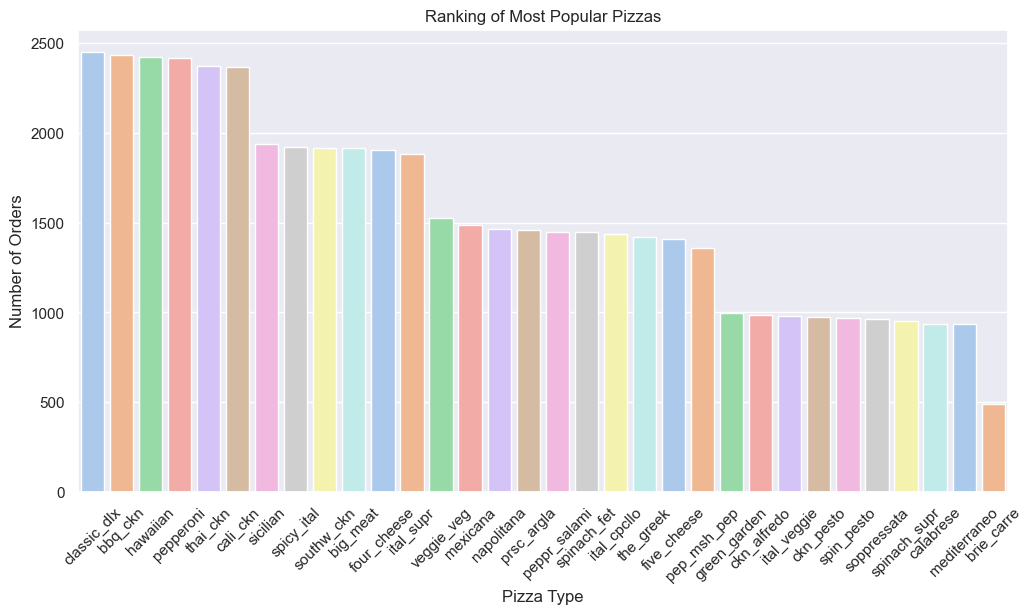

In [38]:
# Atur gaya default Seaborn
sns.set()

# Buat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=pizza_quantity, x='pizza_type_id', y='quantity', palette='pastel')
plt.title('Ranking of Most Popular Pizzas')
plt.xlabel('Pizza Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

## Ringkasan Total Kuantitas Setiap Pizza Type

Dalam analisis data kami, kami telah menggabungkan tabel 'order_details' dengan tabel 'pizzas' berdasarkan kolom 'pizza_id'. Kemudian, kami menghitung total kuantitas setiap 'pizza_type_id' dan mengurutkannya dalam urutan menurun. Berikut adalah beberapa temuan kami:

- **Pizza Type Terlaris:** Pizza Type dengan ID **classic_dlx** memiliki total kuantitas pemesanan tertinggi.

- **Pizza Type Tidak Laku:** Pizza Type dengan ID **brie_carre** memiliki total kuantitas pemesanan terendah.

- **Grafik Total Kuantitas Setiap Pizza Type:** Di bawah ini adalah grafik yang menunjukkan total kuantitas setiap Pizza Type.

![Grafik Total Kuantitas Setiap Pizza Type](nama_file_gambar.png)

Dengan mengetahui total kuantitas setiap Pizza Type, Anda dapat membuat keputusan yang lebih baik terkait persediaan dan permintaan produk.

In [39]:
# Gabungkan tabel 'order_details' dengan tabel 'pizzas'
merged_data = pd.merge(df_order_details, df_pizzas, on='pizza_id')

In [40]:
print(merged_data)

       order_details_id  order_id       pizza_id  quantity pizza_type_id size  \
0                     1         1     hawaiian_m         1      hawaiian    M   
1                   179        77     hawaiian_m         1      hawaiian    M   
2                   357       146     hawaiian_m         1      hawaiian    M   
3                   389       163     hawaiian_m         1      hawaiian    M   
4                   568       247     hawaiian_m         1      hawaiian    M   
...                 ...       ...            ...       ...           ...  ...   
48615             39733     17492  the_greek_xxl         1     the_greek  XXL   
48616             41183     18139  the_greek_xxl         1     the_greek  XXL   
48617             42718     18789  the_greek_xxl         1     the_greek  XXL   
48618             43041     18919  the_greek_xxl         1     the_greek  XXL   
48619             47490     20866  the_greek_xxl         1     the_greek  XXL   

       price  
0     13.250

In [41]:
# Hitung revenue untuk setiap pizza
merged_data['revenue'] = merged_data['quantity'] * merged_data['price']

In [42]:
print(merged_data['revenue'])

0       13.250
1       13.250
2       13.250
3       13.250
4       13.250
         ...  
48615   35.950
48616   35.950
48617   35.950
48618   35.950
48619   35.950
Name: revenue, Length: 48620, dtype: float64


In [43]:
# Kelompokkan data berdasarkan 'size' dan hitung total revenue
size_revenue = merged_data.groupby('size')['revenue'].sum().reset_index()

In [44]:
print(size_revenue)

  size    revenue
0    L 375318.700
1    M 249382.250
2    S 178076.500
3   XL  14076.000
4  XXL   1006.600


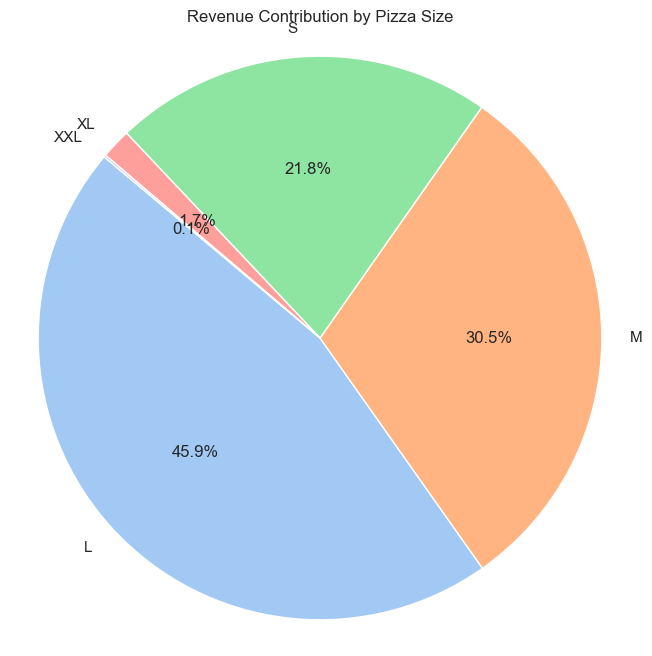

In [45]:
# Buat pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel', len(size_revenue['size']))
plt.pie(size_revenue['revenue'], labels=size_revenue['size'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title('Revenue Contribution by Pizza Size')
plt.show()

## Ringkasan Persentase Kontribusi dari Setiap Pizza Size

Dalam analisis data kami, kami telah menghitung revenue untuk masing-masing pizza size dengan menggunakan formula `revenue = quantity x price`. Berikut adalah beberapa temuan kami:

- **Pizza Size Terbesar:** Pizza size dengan revenue terbesar adalah **Large dengan Revenue = 375,318.7 atau 45.19% dari Total Revenue** 

- **Pizza Size Terkecil:** Pizza size dengan revenue terkecil adalah **XXL dengan Revenue = 1,006.6 atau 0.1% dari Total Revenue**

- **Grafik Persentase Kontribusi dari Setiap Pizza Size:** Di bawah ini adalah grafik pie chart yang menunjukkan persentase kontribusi dari setiap pizza size terhadap total revenue.

![Grafik Persentase Kontribusi dari Setiap Pizza Size](nama_file_gambar.png)

Dengan mengetahui persentase kontribusi dari setiap pizza size, Anda dapat fokus pada strategi penjualan yang paling menguntungkan.

In [46]:
# Gabungkan tabel 'order_details' dengan tabel 'pizzas'
merged_data = pd.merge(df_order_details, df_pizzas, on='pizza_id')

In [47]:
print(merged_data)

       order_details_id  order_id       pizza_id  quantity pizza_type_id size  \
0                     1         1     hawaiian_m         1      hawaiian    M   
1                   179        77     hawaiian_m         1      hawaiian    M   
2                   357       146     hawaiian_m         1      hawaiian    M   
3                   389       163     hawaiian_m         1      hawaiian    M   
4                   568       247     hawaiian_m         1      hawaiian    M   
...                 ...       ...            ...       ...           ...  ...   
48615             39733     17492  the_greek_xxl         1     the_greek  XXL   
48616             41183     18139  the_greek_xxl         1     the_greek  XXL   
48617             42718     18789  the_greek_xxl         1     the_greek  XXL   
48618             43041     18919  the_greek_xxl         1     the_greek  XXL   
48619             47490     20866  the_greek_xxl         1     the_greek  XXL   

       price  
0     13.250

In [48]:
# Hitung revenue untuk setiap pizza
merged_data['revenue'] = merged_data['quantity'] * merged_data['price']

In [49]:
print(merged_data['revenue'])

0       13.250
1       13.250
2       13.250
3       13.250
4       13.250
         ...  
48615   35.950
48616   35.950
48617   35.950
48618   35.950
48619   35.950
Name: revenue, Length: 48620, dtype: float64


In [50]:
# Kelompokkan data berdasarkan 'pizza_type' dan hitung total revenue
pizza_type_revenue = merged_data.groupby('pizza_type_id')['revenue'].sum().reset_index()

In [51]:
print(pizza_type_revenue)

   pizza_type_id   revenue
0        bbq_ckn 42768.000
1       big_meat 22968.000
2     brie_carre 11588.500
3      calabrese 15934.250
4       cali_ckn 41409.500
5    ckn_alfredo 16900.250
6      ckn_pesto 16701.750
7    classic_dlx 38180.500
8    five_cheese 26066.500
9    four_cheese 32265.700
10  green_garden 13955.750
11      hawaiian 32273.250
12   ital_cpcllo 25094.000
13     ital_supr 33476.750
14   ital_veggie 16019.250
15  mediterraneo 15360.500
16      mexicana 26780.750
17    napolitana 24087.000
18   pep_msh_pep 18834.500
19     pepperoni 30161.750
20  peppr_salami 25529.000
21    prsc_argla 24193.250
22      sicilian 30940.500
23   soppressata 16425.750
24    southw_ckn 34705.750
25    spicy_ital 34831.250
26    spin_pesto 15596.000
27   spinach_fet 23271.250
28  spinach_supr 15277.750
29      thai_ckn 43434.250
30     the_greek 28454.100
31    veggie_veg 24374.750


In [52]:
# Urutkan data berdasarkan total revenue (descending)
pizza_type_revenue = pizza_type_revenue.sort_values(by='revenue', ascending=False)

In [53]:
print(pizza_type_revenue)

   pizza_type_id   revenue
29      thai_ckn 43434.250
0        bbq_ckn 42768.000
4       cali_ckn 41409.500
7    classic_dlx 38180.500
25    spicy_ital 34831.250
24    southw_ckn 34705.750
13     ital_supr 33476.750
11      hawaiian 32273.250
9    four_cheese 32265.700
22      sicilian 30940.500
19     pepperoni 30161.750
30     the_greek 28454.100
16      mexicana 26780.750
8    five_cheese 26066.500
20  peppr_salami 25529.000
12   ital_cpcllo 25094.000
31    veggie_veg 24374.750
21    prsc_argla 24193.250
17    napolitana 24087.000
27   spinach_fet 23271.250
1       big_meat 22968.000
18   pep_msh_pep 18834.500
5    ckn_alfredo 16900.250
6      ckn_pesto 16701.750
23   soppressata 16425.750
14   ital_veggie 16019.250
3      calabrese 15934.250
26    spin_pesto 15596.000
15  mediterraneo 15360.500
28  spinach_supr 15277.750
10  green_garden 13955.750
2     brie_carre 11588.500


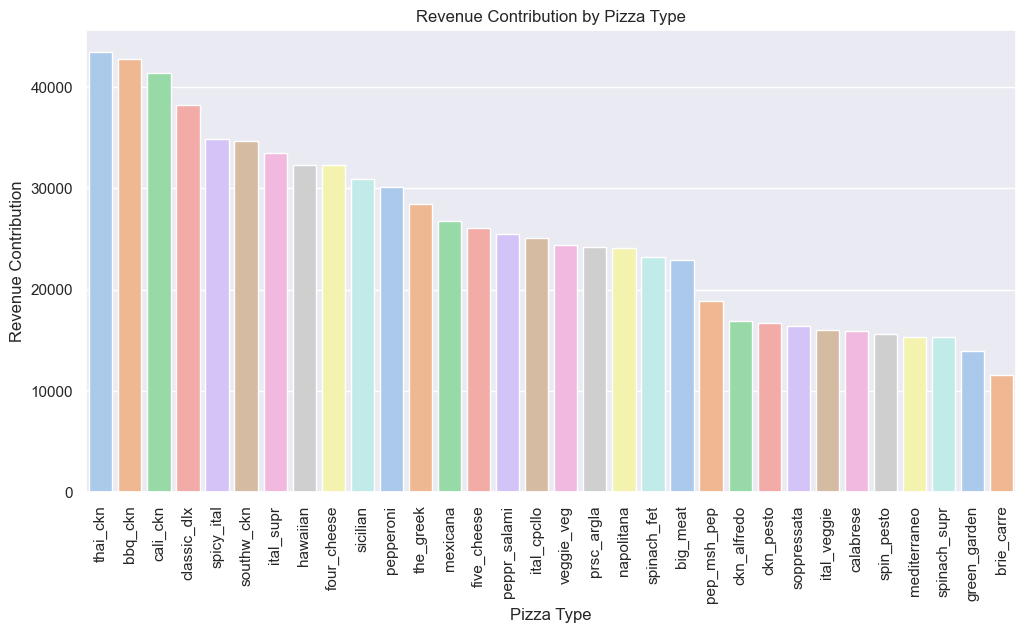

In [54]:
# Atur gaya default Seaborn
sns.set()

# Buat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=pizza_type_revenue, y='revenue', x='pizza_type_id', palette='pastel')
plt.xlabel('Pizza Type')
plt.ylabel('Revenue Contribution')
plt.title('Revenue Contribution by Pizza Type')

# Putar keterangan sumbu X menjadi vertikal
plt.xticks(rotation=90)

plt.show()